<span style="color:green;font-weight:bold">Name : Rashmi Bhaskar 

<span style="color:green;font-weight:bold">Github Username : rashmibhaskar

<span style="color:green;font-weight:bold">USC ID : 4408460333

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from IPython.display import display
from scipy.io.arff import loadarff 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score

<span style="color:green;font-weight:bold">1(a) Download the Vertebral Column Data Set from:https://archive.ics.uci.edu/ml/datasets/Vertebral+Column

In [2]:
raw_data = loadarff('../data/vertebral_column_data/column_2C_weka.arff')
df_data = pd.DataFrame(raw_data[0])

df_data['class_int'] = pd.Categorical(df_data['class']).codes
df_data = df_data.replace({0:1, 1:0})
df_data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,class_int
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal',1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal',1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal',1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal',1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal',1
...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,b'Normal',0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,b'Normal',0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,b'Normal',0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,b'Normal',0


<span style="color:green;font-weight:bold">1b(i) - Make scatterplots of the independent variables in the dataset. Use color to
show Classes 0 and 1.

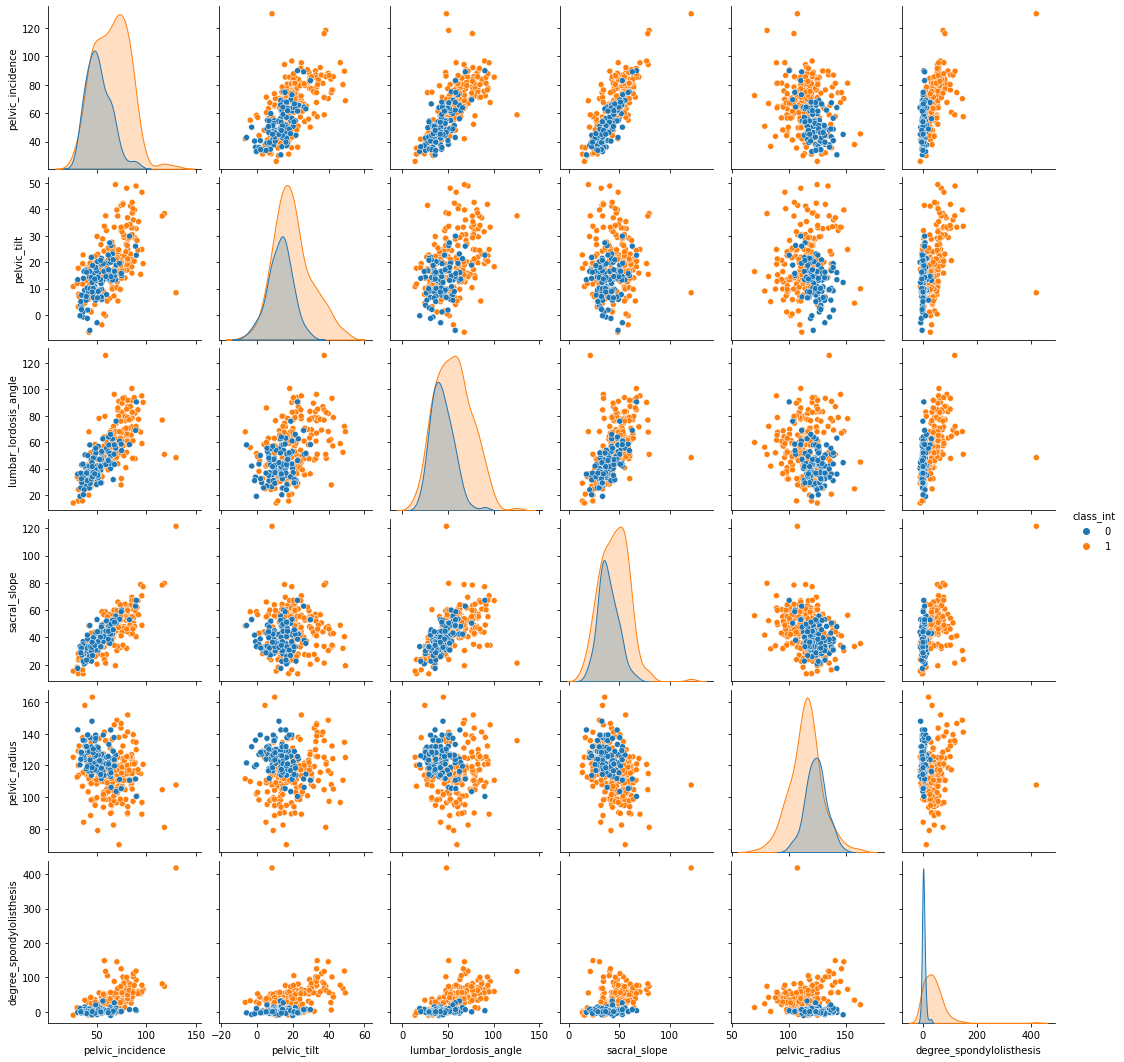

In [3]:
sns.pairplot(df_data, hue="class_int")

<span style="color:green;font-weight:bold">1b(ii) - Make boxplots for each of the independent variables. Use color to show
Classes 0 and 1 (see ISLR p. 129).

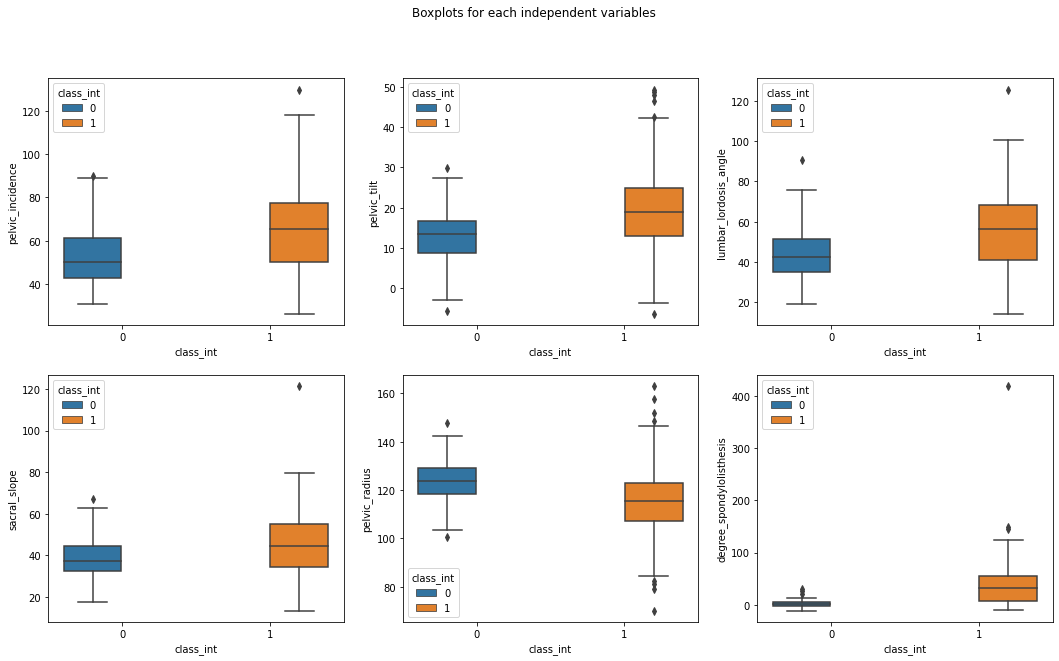

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Boxplots for each independent variables')
feature_axes = {'pelvic_incidence':[0,0],'pelvic_tilt': [0,1],'lumbar_lordosis_angle':[0,2],'sacral_slope':[1,0],'pelvic_radius':[1,1],'degree_spondylolisthesis':[1,2]}
for key,value in feature_axes.items():
    sns.boxplot(ax=axes[value[0],value[1]], x='class_int', y=key, data=df_data, hue='class_int')

<span style="color:green;font-weight:bold">1b(iii) - Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the
training set and the rest of the data as the test set.

In [5]:
df_class0,df_class1 = df_data[df_data['class_int']==0] , df_data[df_data['class_int']==1]
# display(df_class0)
# display(df_class1)

X_class0=df_class0.iloc[:,[0,1,2,3,4,5]]
X_class1=df_class1.iloc[:,[0,1,2,3,4,5]]
# display(X_class0)
# display(X_class1)

y_class0=df_class0.iloc[:,[7]]
y_class1=df_class1.iloc[:,[7]]
# display(y_class0)
# display(y_class1)

X_train = pd.concat([X_class0[:70],X_class1[:140]])
X_test = pd.concat([X_class0[70:],X_class1[140:]])
print("X_train")
display(X_train)
print("X_test")
display(X_test)

y_train=pd.concat([y_class0[:70],y_class1[:140]])
y_test=pd.concat([y_class0[70:],y_class1[140:]])
print("y_train")
display(y_train)
print("y_test")
display(y_test)

X_train


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910
...,...,...,...,...,...,...
135,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607
136,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083
137,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096
138,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159


X_test


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
280,50.086153,13.430044,34.457541,36.656108,119.134622,3.089484
281,64.261507,14.497866,43.902504,49.763642,115.388268,5.951454
282,53.683380,13.447022,41.584297,40.236358,113.913703,2.737035
283,48.995958,13.113820,51.873520,35.882137,126.398188,0.535472
284,59.167612,14.562749,43.199158,44.604863,121.035642,2.830504
...,...,...,...,...,...,...
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107
206,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629


y_train


,class_int
210,0
211,0
212,0
213,0
214,0
...,...
135,1
136,1
137,1
138,1


y_test


,class_int
280,0
281,0
282,0
283,0
284,0
...,...
205,1
206,1
207,1
208,1


<span style="color:green;font-weight:bold">1c(i) - Write code for k-nearest neighbors with Euclidean metric (or use a software
package).

<span style="color:green;font-weight:bold">Here, I am taking a random k value = 5 to train the model and 

<span style="color:green;font-weight:bold">KNeighborsClassifier() - trains model to Euclidean metric by default

In [6]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train.values.ravel())
y_pred=knn_model.predict(X_test)
print("Accuracy is ",metrics.accuracy_score(y_test,y_pred))

Accuracy is  0.9


<span style="color:green;font-weight:bold">1c(ii) - Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208,205, . . . ,7,4,1,}(in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k=k∗

<span style="color:green;font-weight:bold">Note: 
- <span style="color:green;font-weight:bold">The KNeighborsClassifier() functionality in scikit learn takes decisions by majority polling as an option by default when not specified explicitely.

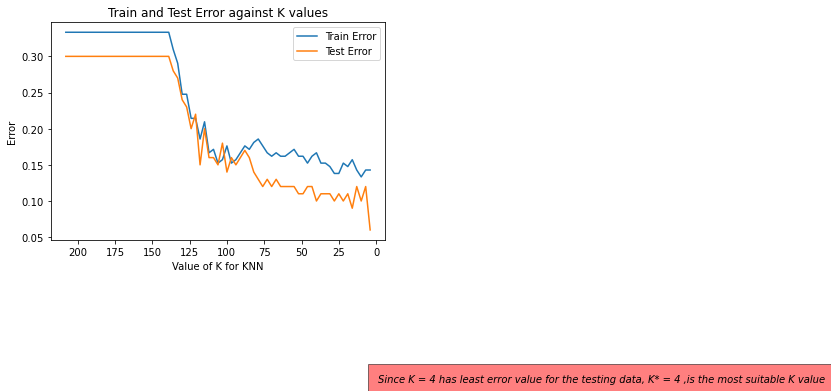

Accuracy when k*=4:  0.94
Confusion Matrix when k*=4: 
 [[25  5]
 [ 1 69]]
True Negative Rate when k*=4:  0.8333333333333334
True Positive Rate when k*=4:  0.9857142857142858
Precision when k*=4:  0.9324324324324325
F1_Score when k*=4:  0.9583333333333333


In [7]:
k_range = list(range(208,1,-3))
train_error = []
test_error = []
least_error = 1
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    y_pred_test=knn.predict(X_test)
    y_pred_train=knn.predict(X_train)
    train_error.append(1-metrics.accuracy_score(y_train,y_pred_train))
    test_error.append(1-metrics.accuracy_score(y_test,y_pred_test))
    if(1-metrics.accuracy_score(y_test,y_pred_test)<least_error):
        best_k = k

plt.plot(k_range,train_error,label='Train Error')
plt.plot(k_range,test_error,label='Test Error')
plt.gca().invert_xaxis()
plt.title("Train and Test Error against K values")
plt.xlabel("Value of K for KNN")
plt.ylabel("Error")
plt.text(-1,-0.15,"Since K = "+ str(best_k) +" has least error value for the testing data, K* = "+ str(best_k) +" ,is the most suitable K value", style='italic', bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
plt.legend()
plt.show()

knn_model_4 = KNeighborsClassifier(n_neighbors=best_k)
knn_model_4.fit(X_train,y_train.values.ravel())
y_pred_4=knn_model_4.predict(X_test)
print("Accuracy when k*=" +str(best_k)+": ",metrics.accuracy_score(y_test,y_pred_4))

CM = confusion_matrix(y_test, y_pred_4)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
print("Confusion Matrix when k*=" +str(best_k)+": \n", CM)
print("True Negative Rate when k*=" +str(best_k)+": ",TN/(FP+TN))
print("True Positive Rate when k*=" +str(best_k)+": ",TP/(TP+FN))
PS = precision_score(y_test, y_pred_4)
print("Precision when k*=" +str(best_k)+": ",PS)
F1 = f1_score(y_test, y_pred_4)
print("F1_Score when k*=" +str(best_k)+": ",F1)

<span style="color:green;font-weight:bold">1c(iii) - Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate ,which is obtained by some value of k , against the size of training set, when the size of training set is N ∈ {10,20,30, . . . ,210}. Note: for each N, select your training set by choosing the first N/3 rows of Class 0 and the first N − N/3 rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11, . . . ,196}.This plot is called a Learning Curve.

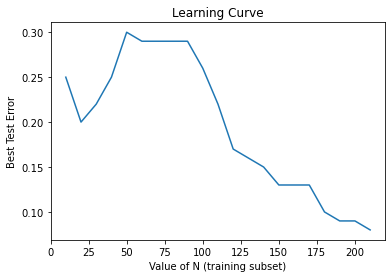

In [8]:
N = list(range(10,211,10))
error_map = {}
for N_val in N:
    set_val0 = math.floor(N_val/3)
    set_val1 = N_val-set_val0
    X_train_set = pd.concat([X_class0[:set_val0],X_class1[:set_val1]])
    y_train_set = pd.concat([y_class0[:set_val0],y_class1[:set_val1]])
    k_range_N = list(range(1,N_val+1,5))
    best_error = 1
    for k_val in k_range_N:
        knn_N = KNeighborsClassifier(n_neighbors=k_val)
        knn_N.fit(X_train_set,y_train_set.values.ravel())
        y_pred_test_N=knn_N.predict(X_test)
        test_error = 1-metrics.accuracy_score(y_test,y_pred_test_N)
        if(test_error < best_error):
            best_error = test_error
            error_map[N_val]= best_error
N_key,error_value = error_map.keys(), error_map.values()
plt.plot(N_key,error_value)
plt.title("Learning Curve")
plt.xlabel("Value of N (training subset)")
plt.ylabel("Best Test Error")
plt.show()

<span style="color:green;font-weight:bold">1d - Replace the Euclidean metric with the following metrics and test them. Sum-marize the test errors (i.e., when k=k∗) in a table. Use all of your training data and select the best k when {1,6,11, . . . ,196}.

- <span style="color:green;font-weight:bold">The train_model() - is a modularised function that I have coded.It can be used to calculate values for different distance metrics.

In [9]:
def train_model(metric='minkowski', weights='uniform' , p=2, metric_params=None):
    k_range = list(range(1,200,5))
    best_test_error = 1
    best_train_error = 1
    for k in k_range:
        model = KNeighborsClassifier(n_neighbors=k ,metric=metric, weights=weights, p=p, metric_params=metric_params)
        model.fit(X_train,y_train.values.ravel())
        pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        test_error = 1-metrics.accuracy_score(y_test,pred)
        train_error = 1-metrics.accuracy_score(y_train,y_pred_train)
        if(test_error<best_test_error and k!=1):
            best_test_error = test_error
            best_k = k
        if(train_error<best_train_error ):
            best_train_error = train_error

    return [metric,p,best_train_error,best_test_error,best_k]

<span style="color:green;font-weight:bold">1d(i)A - which becomes Manhattan Distance with p = 1.

In [10]:
manhattan = train_model(metric='manhattan', p=1)
print("metric",manhattan[0])
print("best train error",manhattan[2])
print("best test error", manhattan[3])
print("best k",  manhattan[4])

metric manhattan
best train error 0.0
best test error 0.10999999999999999
best k 6


<span style="color:green;font-weight:bold">1d(i)B - with log10(p)∈ {0.1,0.2,0.3, . . . ,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [11]:
p_range = {}
log_p = 0.1
best_error_log_p = 1
while(log_p<=1):
    p_range[round(log_p,1)]=math.pow(10,log_p)
    log_p+=0.1
for p_key, p_value in p_range.items():
    model_log_p = KNeighborsClassifier(n_neighbors=manhattan[4] ,metric='minkowski', p=p_value)
    model_log_p.fit(X_train,y_train.values.ravel())
    pred_log_p=model_log_p.predict(X_test)
    test_error_log_p = 1-metrics.accuracy_score(y_test,pred_log_p)
    if(test_error_log_p < best_error_log_p):
        best_error_log_p = test_error_log_p
        best_log_p = p_key
print("The best Log 10(p) value is : ",best_log_p)
manhattan_logp=['manhattan with best log10(p)='+str(best_log_p), math.pow(10,best_log_p), "", best_error_log_p, str(manhattan[4])+" (fixed)"]

The best Log 10(p) value is :  0.6


<span style="color:green;font-weight:bold">1d(i)C - which becomes Chebyshev Distance with p→ ∞

In [12]:
chebyshev = train_model(metric='chebyshev',p=float('inf'))
print("metric",chebyshev[0])
print("best train error",chebyshev[2])
print("best test error", chebyshev[3])
print("best k",  chebyshev[4])

metric chebyshev
best train error 0.0
best test error 0.07999999999999996
best k 16


<span style="color:green;font-weight:bold">1d(ii) - Mahalanobis Distance.

In [13]:
mahalanobis = train_model(metric='mahalanobis', metric_params={'VI': np.linalg.pinv(np.cov(X_train.T))})
print("metric",mahalanobis[0])
print("best train error",mahalanobis[2])
print("best test error", mahalanobis[3])
print("best k",  mahalanobis[4])

metric mahalanobis
best train error 0.0
best test error 0.16000000000000003
best k 6


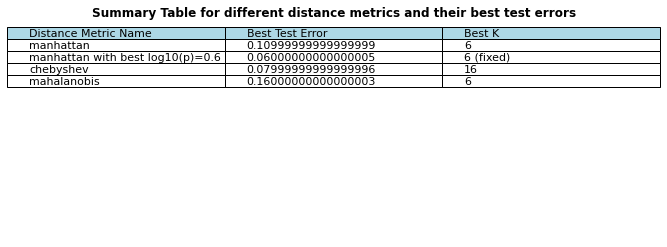

In [14]:
val1 = ["Distance Metric Name", "Best Test Error", "Best K" ] 
val3 = [[manhattan[0],manhattan[3],manhattan[4]],
        [manhattan_logp[0],manhattan_logp[3],manhattan_logp[4]],
        [chebyshev[0],chebyshev[3],chebyshev[4]],
        [mahalanobis[0],mahalanobis[3],mahalanobis[4]]]
fig, ax = plt.subplots(1,1) 
ax.set_axis_off() 
table = ax.table( 
    cellText = val3,   
    colLabels = val1, 
    colWidths = [0.65]*4,
    colColours =["lightblue"] * 10, 
    colLoc ='left',
    cellLoc ='left',
    loc = "upper center")         
table.auto_set_font_size(False)
table.set_fontsize(11)
ax.set_title('Summary Table for different distance metrics and their best test errors', 
             fontweight ="bold") 
   
plt.show()

<span style="color:green;font-weight:bold">1(e) - The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16, . . . ,196}.

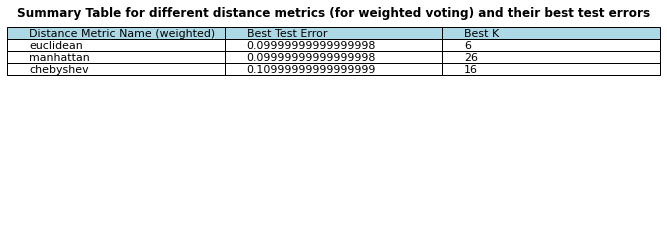

In [15]:
euclidean_wgt = train_model(metric='euclidean', weights='distance')
manhattan_wgt = train_model(metric='manhattan', weights='distance', p=1)
chebyshev_wgt = train_model(metric='chebyshev', weights='distance', p=float('inf'))
vala = ["Distance Metric Name (weighted)", "Best Test Error", "Best K" ] 
valb = [[euclidean_wgt[0],euclidean_wgt[3],euclidean_wgt[4]],
        [manhattan_wgt[0],manhattan_wgt[3],manhattan_wgt[4]],
        [chebyshev_wgt[0],chebyshev_wgt[3],chebyshev_wgt[4]]]
fig, ax = plt.subplots(1,1) 
ax.set_axis_off() 
table = ax.table( 
    cellText = valb,   
    colLabels = vala, 
    colWidths = [0.65]*4,
    colColours =["lightblue"] * 10, 
    colLoc ='left',
    cellLoc ='left',
    loc = "upper center")         
table.auto_set_font_size(False)
table.set_fontsize(11)
ax.set_title('Summary Table for different distance metrics (for weighted voting) and their best test errors', 
             fontweight ="bold") 
   
plt.show()

<span style="color:green;font-weight:bold">1(f) - What is the lowest training error rate you achieved in this homework?

In [16]:
print('The lowest training error achieved in this homework was 0.0')

The lowest training error achieved in this homework was 0.0


<span style="color:green;font-weight:bold">References/links -

<span style="color:grey">[1]- https://stackoverflow.com/questions/46401209/how-to-convert-the-arff-object-loaded-from-a-arff-file-into-a-dataframe-format

<span style="color:grey">[2]- https://pub.towardsai.net/k-nearest-neighbors-knn-algorithm-tutorial-machine-learning-basics-ml-ec6756d3e0ac

<span style="color:grey">[3]- https://stats.stackexchange.com/questions/367010/training-error-in-knn-classifier-when-k-1

<span style="color:grey">[4] - https://colab.research.google.com/github/dlsun/pods/blob/master/05-Regression-Models/5.5%20Estimating%20the%20Test%20Error.ipynb#scrollTo=2FcPYPB0l05o

<span style="color:grey">[5] - https://colab.research.google.com/github/dlsun/pods/blob/master/05-Regression-Models/5.4%20Training%20and%20Test%20Errors.ipynb

<span style="color:grey">[6] - https://matplotlib.org/stable/tutorials/text/text_intro.html

<span style="color:grey">[7] - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

<span style="color:grey">[8] - https://stats.stackexchange.com/questions/61829/given-true-positive-false-negative-rates-can-you-calculate-false-positive-tru

<span style="color:grey">[9] - https://stackoverflow.com/questions/67215974/knn-prediction-with-l1-manhattan-distance

<span style="color:grey">[10] - https://python-course.eu/machine-learning/k-nearest-neighbor-classifier-with-sklearn.php

<span style="color:grey">[11] - https://stackoverflow.com/questions/34643548/how-to-use-mahalanobis-distance-in-sklearn-distancemetrics

<span style="color:grey">[12] - https://stackoverflow.com/questions/59830510/defining-distance-parameter-v-in-knn-crossval-grid-search-seuclidean-mahalano

<span style="color:grey">[13] - https://stackoverflow.com/questions/31966494/compare-1-independent-vs-many-dependent-variables-using-seaborn-pairplot-in-an-h

<span style="color:grey">[14] - https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected

<span style="color:grey">[15] - https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75

